In [1]:
# PROTOTYPE Code for energy reconstruction using AERA's double gaussian
# Ready to read simulations from CORSIKA/Coreas
# using the grand official package
# Date: April 08, 2020

# Written by Bruno L. Lago

In [2]:
from modERec import EnergyRec
import numpy as np

* EnergyRec default values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01




# Training stage

This block loops over a given set of simulations and writes the shower plane fluences and antenna positions to a file.

In [3]:
!rm bestfit.out
!rm fluences_all.out

for i in range(100001,100021):
    sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim' + str(i)
    rec1 = EnergyRec(sim_dir)
    rec1.bool_EarlyLate = True
    rec1.Eval_fluences()

    fluences_file = open("fluences_all.out",'a')
    fluences = np.c_[rec1.shower.r_proj[:,0:2],rec1.fluence_arr]
    for item in fluences:
        print(str(item)[1:-1],file=fluences_file)
    fluences_file.close()
    
    


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  F

--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;




###  Determination of the $C$ parameters

The double gaussian parametrization has a set of parameters $C$ to be determined. In this block, these paramaters are fit to all the simulations at once.
This end the training stage.

In [4]:
rec1 = EnergyRec(sim_dir)
rec1.model_fit("fluences_all.out")
Cs =rec1.bestfit[2:7]

* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Model fit:
** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A           1.091     1.5808
--->  sigma         300   627.8199
--->  C0            0.5     0.8556
--->  C1            -10    -9.8385
--->  C2             20    28.4039
--->  C3             16     8.6988
--->  C4           0.01     0.0061
--->  ----------------------------
--->  Chi2min/n.d.o.f =  88.77  /  1948




# $S_{radio}$ determination

With the $C$ parameters determined, a new fit is performed in order to determine $A$ and $\sigma$ for each simulation and obtain the $S_{radio}$ to be related with the cosmic ray energy.

In [5]:
!rm CR_input_Sradio.out
for i in range(100001,100021):
    sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim' + str(i)
    rec1 = EnergyRec(sim_dir)
    rec1.bool_EarlyLate = True
    rec1.Eval_fluences()
    rec1.model_fit("",Cs)

* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* Model fit:
--> Early-late correction applied
** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A            0.89     1.3451
--->  sigma         300   581.6753
--->  C0            0.5     0.8556
--->  C1            -10    -9.8385
--->  C2             20    28.4039
--->  C3             16     8.6988
--->  C4           0.01     0.0061
--->  ----------------------------
--->  Chi2min/n.d.o.f =  4.95  /  97


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False


--> 90 % complete;
--> 100 % complete;


* Model fit:
--> Early-late correction applied
** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A           0.927     1.2904
--->  sigma         300   577.6208
--->  C0            0.5     0.8556
--->  C1            -10    -9.8385
--->  C2             20    28.4039
--->  C3             16     8.6988
--->  C4           0.01     0.0061
--->  ----------------------------
--->  Chi2min/n.d.o.f =  5.63  /  97


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* Model fit:
--> Early-late correction applied
** AERA f

** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A           1.007     1.4761
--->  sigma         300   576.4729
--->  C0            0.5     0.8556
--->  C1            -10    -9.8385
--->  C2             20    28.4039
--->  C3             16     8.6988
--->  C4           0.01     0.0061
--->  ----------------------------
--->  Chi2min/n.d.o.f =  6.05  /  98


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* Model fit:
--> Early-late correction applied
** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A       

Text(0, 0.5, '#')

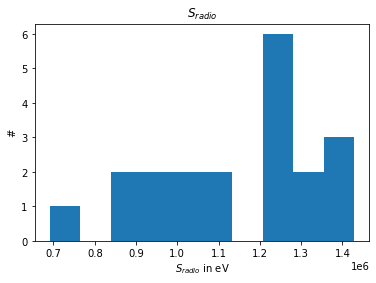

In [6]:
import matplotlib.pyplot as plt
S_radio = np.loadtxt("CR_input_Sradio.out")
plt.hist(S_radio)

plt.title(r'$S_{radio}$')
plt.xlabel(r'$S_{radio}$ in eV')
plt.ylabel('#')

# Plot the resulting fit and data

This block plots all the simulations in a single graph for illustrative purposes.

In [7]:
rec1.model_fit("fluences_all.out",Cs)

* Model fit:
** AERA fit:
--->  Par       Initial    Bestfit
--->  ----------------------------
--->  A           1.091     1.5945
--->  sigma         300   627.5436
--->  C0            0.5     0.8556
--->  C1            -10    -9.8385
--->  C2             20    28.4039
--->  C3             16     8.6988
--->  C4           0.01     0.0061
--->  ----------------------------
--->  Chi2min/n.d.o.f =  88.71  /  1953




S_radio= 1496089.7


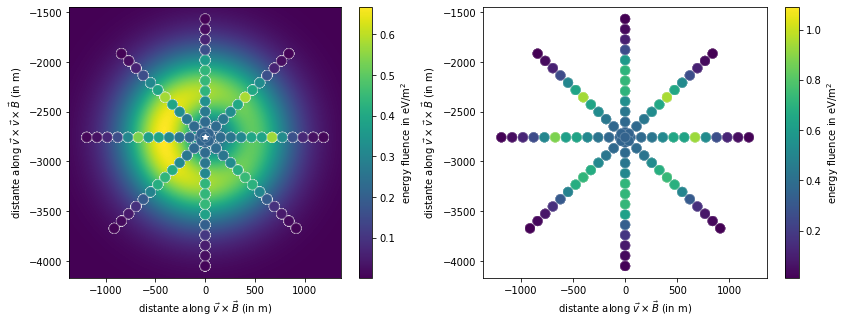

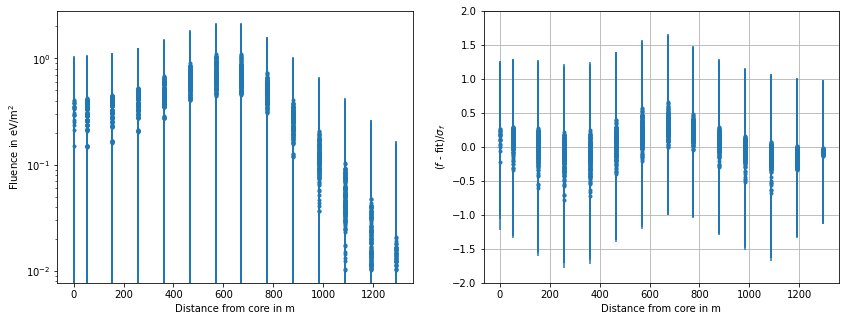

In [8]:
rec1.AERA.aeraPlot(rec1)

In [87]:
def eval_mean_fluences(x_proj, y_proj, fluence_arr):
    fluence_mean = {}
    fluence_mean2 = {}
    counter = {}
    pos = {}
    for i in range(len(fluence_arr)):
        label = str(x_proj[i]) + str(y_proj[i])

        if label in counter:
            counter[label] = counter[label] + 1
        else:
            counter[label] = 1

        pos[label] = [x_proj[i],y_proj[i]]

        if label in fluence_mean:
            fluence_mean[label] += fluence_arr[i]
            fluence_mean2[label] += fluence_arr[i]**2
        else:
            fluence_mean[label] = fluence_arr[i]
            fluence_mean2[label] = fluence_arr[i]**2
    
    f_mean = np.zeros(len(pos))
    f_mean2 = np.zeros(len(pos))
    r = np.zeros((len(pos),2))

    trim_counter = {}
    for key, value in counter.items():
        if value < 2:
            pos.pop(key)
    
    index = 0
    for key, value in pos.items():
        label = key
        f_mean[index] = fluence_mean[label]/counter[label]
        f_mean2[index] = fluence_mean2[label]/counter[label]
        r[index] = value
        index += 1

    return r[:,0], r[:,1], f_mean, np.sqrt(f_mean2-f_mean**2)

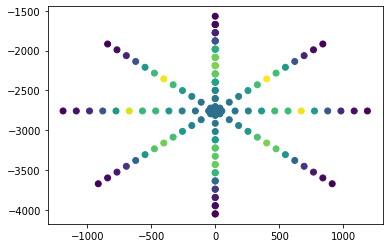

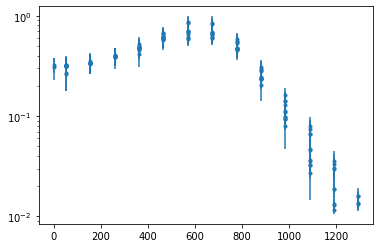

In [88]:
self = rec1
sel_signal = np.where(self.fluence_arr>0)
x_proj = self.shower.r_proj[:,0]
y_proj = self.shower.r_proj[:,1]
new_x, new_y, mean_f, sigma_f = eval_mean_fluences(x_proj[sel_signal], y_proj[sel_signal], self.fluence_arr[sel_signal])
#new_x, new_y, mean_f, sigma_f = eval_mean_fluences(x_proj, y_proj, self.fluence_arr)


plt.scatter(new_x,new_y,c=mean_f)

rcore = self.shower.r_Core_proj[0:2]
temp_x = new_x - rcore[0]
temp_y = new_y - rcore[1]

dist = np.sqrt(temp_x*temp_x+temp_y*temp_y)

plt.figure()
plt.errorbar(dist,mean_f,yerr=sigma_f,fmt='.')
plt.gca().set_yscale('log')

S_radio= 1496089.7
8.280223016747001e-05 1.09128709


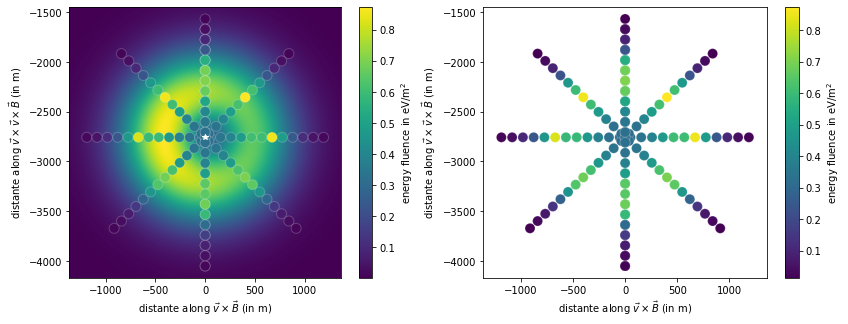

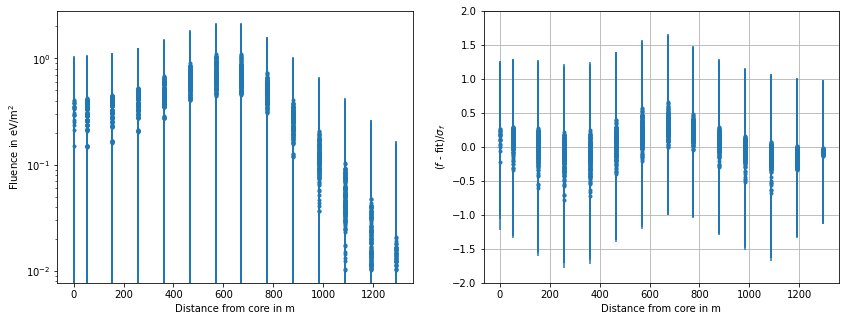

In [90]:
self = rec1

my_evB = np.array([1,0])
            
A = self.bestfit[0]
sigma = self.bestfit[1]
rcore = self.shower.r_Core_proj[0:2]
sin2Alpha = (1-np.dot(self.shower.ev,self.shower.eB)**2.)

Cs = np.array([self.bestfit[2],self.bestfit[3],self.bestfit[4],self.bestfit[5],self.bestfit[6]])
Sradio = (A*np.pi/sin2Alpha)*(sigma**2. - Cs[0]*(Cs[3]**2.)*np.exp(2*Cs[4]*sigma))
print('S_radio=',round(Sradio,2))

par = [A,sigma,Cs[0],Cs[1],Cs[2],Cs[3],Cs[4]]

sel_signal = np.where(self.fluence_arr>0)

delta_X = np.max(self.shower.r_proj[:,0][sel_signal]) - np.min(self.shower.r_proj[:,0][sel_signal])
delta_Y = np.max(self.shower.r_proj[:,1][sel_signal]) - np.min(self.shower.r_proj[:,1][sel_signal])
mean_X = np.min(self.shower.r_proj[:,0][sel_signal]) + delta_X/2
mean_Y = np.min(self.shower.r_proj[:,1][sel_signal]) + delta_Y/2

delta_XY = np.max([delta_X,delta_Y])*1.10

minXAxis = mean_X-delta_XY/2
maxXAxis = mean_X+delta_XY/2
minYAxis = mean_Y-delta_XY/2
maxYAxis = mean_Y+delta_XY/2

xx = np.arange(minXAxis,maxXAxis,delta_XY/500)
yy = np.arange(minYAxis,maxYAxis,delta_XY/500)
X,Y = np.meshgrid(xx, yy) # grid of point


Z=np.zeros((yy.size,xx.size))

for i in range(yy.size):
    for j in range(xx.size):
        Z[i,j] = EnergyRec.AERA.aeraLDF(par, None, my_evB, X[i,j], Y[i,j]) # evaluation of the function on the grid

fig = plt.figure(figsize=[14,5])
plt.subplot(121)
im = plt.imshow(Z,cmap='viridis',origin = 'lower', extent=[minXAxis,maxXAxis,minYAxis,maxYAxis]) # drawing the function


x_proj = self.shower.r_proj[:,0]
y_proj = self.shower.r_proj[:,1]

new_x, new_y, mean_f, sigma_f = eval_mean_fluences(x_proj[sel_signal], y_proj[sel_signal], self.fluence_arr[sel_signal])

#plt.scatter(x_proj[sel_signal], y_proj[sel_signal], c=self.fluence_arr[sel_signal], cmap='viridis', s = 100, edgecolors=(1,1,1,0.2))
plt.scatter(new_x, new_y, c=mean_f, cmap='viridis', s = 100, edgecolors=(1,1,1,0.2))
plt.clim(np.min([np.min(Z),np.min(mean_f)]), np.max([np.max(Z),np.max(mean_f)]))
print(np.min([np.min(Z),np.min(self.fluence_arr[sel_signal])]), np.max([np.max(Z),np.max(self.fluence_arr[sel_signal])]))
plt.colorbar().ax.set_ylabel(r"energy fluence in eV/m$^2$")
plt.xlabel(r'distante along $\vec{v}\times\vec{B}$ (in m)')
plt.ylabel(r'distante along $\vec{v}\times\vec{v}\times\vec{B}$ (in m)')

plt.plot(rcore[0], rcore[1],'w*')

plt.subplot(122)
plt.scatter(new_x, new_y, c=mean_f, cmap='viridis', s = 100, edgecolors=(1,1,1,0.2))
plt.xlabel(r'distante along $\vec{v}\times\vec{B}$ (in m)')
plt.ylabel(r'distante along $\vec{v}\times\vec{v}\times\vec{B}$ (in m)')
plt.clim(np.min(mean_f), np.max(mean_f))
plt.colorbar().ax.set_ylabel(r"energy fluence in eV/m$^2$")
plt.xlim(minXAxis,maxXAxis)
plt.ylim(minYAxis,maxYAxis)

# 1D LDF
temp_x = x_proj - rcore[0]
temp_y = y_proj - rcore[1]

temp_dist = np.sqrt(temp_x*temp_x+temp_y*temp_y)

fig_ldf = plt.figure(figsize=[14,5])
plt.subplot(121)
plt.errorbar(temp_dist[sel_signal],self.fluence_arr[sel_signal],yerr=np.sqrt(self.fluence_arr[sel_signal]),fmt='.')
plt.xlabel("Distance from core in m")
plt.ylabel(r"Fluence in eV/m$^2$")
plt.gca().set_yscale('log')

residual = np.zeros(self.fluence_arr[sel_signal].size)

for i in range(self.fluence_arr[sel_signal].size):
    residual[i] = (self.fluence_arr[sel_signal][i] - EnergyRec.AERA.aeraLDF(par, None,my_evB, x_proj[sel_signal][i], y_proj[sel_signal][i]))/np.sqrt(self.fluence_arr[sel_signal][i])


plt.subplot(122)
plt.errorbar(temp_dist[sel_signal],residual,yerr=1,fmt='.')
plt.xlabel("Distance from core in m")
plt.ylabel(r"($f$ - fit)/$\sigma_f$")    
#plt.xlim(0,500)
plt.ylim(-2,2)
plt.grid()

In [91]:
ant_arr = np.full(10,rec1.Antenna(self.nu_low,self.nu_high,self.SNR_thres))

In [95]:
rec1.Antenna.compute_fluence()

TypeError: compute_fluence() missing 1 required positional argument: 'self'